In [1]:
# Import Modules
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [2]:
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", X_train.shape)
print("y_train.shape", y_train.shape)

170500096/170498071 [==============================] - 2s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [3]:
K = len(set(y_train))
print("number of classes: ", K)

number of classes:  10


### Build the model

In [12]:
i = Input(shape=X_train[0].shape)

x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        1849

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Fitting the model without data augmentation
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 17s 6ms/step - loss: 1.6730 - accuracy: 0.4598 - val_loss: 0.9910 - val_accuracy: 0.6495
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8787 - accuracy: 0.6946 - val_loss: 1.3976 - val_accuracy: 0.5846
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7028 - accuracy: 0.7572 - val_loss: 0.6785 - val_accuracy: 0.7743
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5866 - accuracy: 0.7983 - val_loss: 0.6566 - val_accuracy: 0.7799
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4770 - accuracy: 0.8347 - val_loss: 0.6676 - val_accuracy: 0.7850
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3933 - accuracy: 0.8631 - val_loss: 0.7371 - val_accuracy: 0.7684
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3398 - accuracy: 0.8834 - val_loss: 0.6301 - val_accuracy

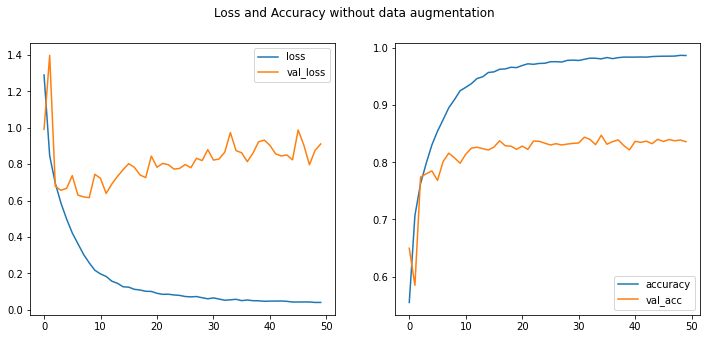

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle("Loss and Accuracy without data augmentation")

# Plot loss per iteration
ax1.plot(r.history['loss'], label='loss')
ax1.plot(r.history['val_loss'], label='val_loss')
ax1.legend()

# Plot accuracy per iteration
ax2.plot(r.history['accuracy'], label='accuracy')
ax2.plot(r.history['val_accuracy'], label='val_acc')
ax2.legend()

### Implement Data Augmentation
Using Keras Image data generator

In [14]:
batch_size = 32

# Create an image data gen object
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                                           height_shift_range=0.1,
                                                           horizontal_flip=True)

# Create a train data generator using data_gen object
train_gen = data_gen.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0]//batch_size

In [15]:
# Fit the model using train_gen as data input
r = model.fit_generator(train_gen, validation_data=(X_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
1562/1562 [==============================] - 27s 17ms/step - loss: 1.8612 - accuracy: 0.4083 - val_loss: 1.0824 - val_accuracy: 0.6176
Epoch 2/50
1562/1562 [==============================] - 26s 16ms/step - loss: 1.0791 - accuracy: 0.6218 - val_loss: 1.0731 - val_accuracy: 0.6508
Epoch 3/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.8801 - accuracy: 0.6911 - val_loss: 0.8151 - val_accuracy: 0.7229
Epoch 4/50
1562/1562 [==============================] - 26s 16ms/step - loss: 0.7803 - accuracy: 0.7333 - val_loss: 0.6917 - val_accuracy: 0.7668
Epoch 5/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.7063 - accuracy: 0.7579 - val_loss: 0.7021 - val_accuracy: 0.7614
Epoch 6/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.6476 - accuracy: 0.7784 - val_loss: 0.6453 - val_accuracy: 0.7774
Epoch 7/50
1562/1562 [==============================] - 26s 16ms/step - loss: 0.5996 - accuracy: 0.7946 - val_loss: 0.6505 -

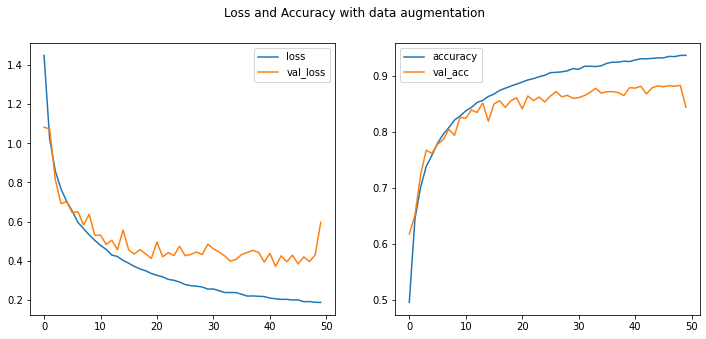

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle("Loss and Accuracy with data augmentation")

# Plot loss per iteration
ax1.plot(r.history['loss'], label='loss')
ax1.plot(r.history['val_loss'], label='val_loss')
ax1.legend()

# Plot accuracy per iteration
ax2.plot(r.history['accuracy'], label='accuracy')
ax2.plot(r.history['val_accuracy'], label='val_acc')
ax2.legend()

Plot the confusion matrix

Confusion matrix, without normalization
[[864  11  17   6   3   0  18   2  61  18]
 [  3 955   0   1   1   0   4   0   5  31]
 [ 48   2 764  15  25   6 116   5  11   8]
 [ 21   6  37 665  12  38 176   9  20  16]
 [ 10   1  27  27 778  19 129   5   1   3]
 [  9   3  31 124  16 676 117  13   6   5]
 [  3   4   9   6   2   0 972   0   3   1]
 [ 16   1  15  20  21  22  25 869   3   8]
 [ 16  10   2   0   1   0   4   1 952  14]
 [  5  41   0   2   1   0   4   0   8 939]]


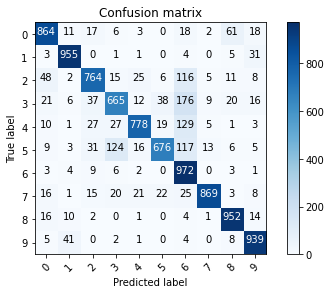

In [17]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))